In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
july_df = pd.read_csv("../nasa_data/sessionized_data/sessionize_date_july.csv")
july_df.head()

G:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ipaddress,date,time,webpage,bytes_recv,datetime,unix_timestamp,session_id
0,***.novo.dk,11/Jul/1995,08:17:09,/ksc.html,7067,1995-07-11 08:17:09,805450629,1.0
1,***.novo.dk,11/Jul/1995,08:17:48,/shuttle/missions/missions.html,8678,1995-07-11 08:17:48,805450668,1.0
2,***.novo.dk,11/Jul/1995,08:21:05,/shuttle/missions/sts-35/mission-sts-35.html,12118,1995-07-11 08:21:05,805450865,1.0
3,***.novo.dk,11/Jul/1995,08:21:19,/shuttle/missions/sts-35/mission-sts-35.html,12118,1995-07-11 08:21:19,805450879,1.0
4,***.novo.dk,11/Jul/1995,08:23:01,/shuttle/resources/orbiters/columbia.html,6922,1995-07-11 08:23:01,805450981,1.0


In [3]:
unique_pages = np.unique(july_df["webpage"].values)
len(unique_pages)


1832

In [5]:
total_pages = july_df["webpage"].shape[0]
total_pages

533770

In [7]:
ratio_unique_to_total =  len(unique_pages)/total_pages
ratio_unique_to_total

0.0034321898945238586

## There are 1832 unique pages / 533770 total pages - which is good for association analysis

In [8]:
july_grouped_df = july_df.groupby("session_id").size().reset_index()

In [10]:
july_grouped_df.columns = ["session_id", "num_sessions"]
july_grouped_df.head()

,session_id,num_sessions
0,1.0,6
1,2.0,10
2,3.0,6
3,4.0,2
4,5.0,2


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


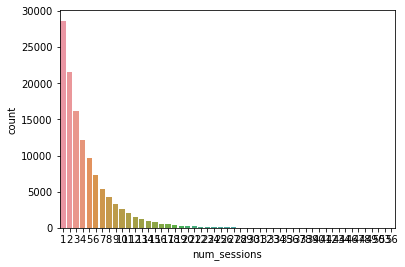

In [13]:
sns.countplot(x="num_sessions", data=july_grouped_df)